# How should I price auto insurance in the United States?

## Introduction

**Business Context.** The ability to price an insurance quote properly has a significant impact on insurers' management decisions and financial statements. You are the chief data scientist at a large insurance company and you are tasked to build an accurate predictive model to understand what factors affect the claim amount. Your findings will be used as a basis to make better management decisions about investments, new products and sales strategy, build trust and stability through accurate financial statements. Your goal is to use the data to predict the severity of insurance claims.

**Business Problem.** Your task is to **build a model to predict the cost of insurance from data using various characteristics of a policyholder.**

**Analytical Context.** The data resides in a CSV file which has been pre-cleaned for you and can directly be read in. Throughout the case, you will be iterating on your initial model many times based on common pitfalls that arise which we discussed in previous cases.

In [1]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
#import plotly.plotly           as py
import os

# This statement allow to display plot without asking to 
%matplotlib inline
# always make it pretty 
plt.style.use('ggplot')
#from pandas.plotting import scatter_matrix

/home/daniel/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## Diving into the data

In [2]:
DATA = pd.read_csv('ALLSTATEcost-cleaned.csv',
    dtype = { # indicate categorical variables
        "A": "category",
        "B": "category",
        "C": "category",
        "D": "category",
        "E": "category",
        "F": "category",
        "G": "category",
        "car_value": "category",
        "day": "category",
        "state": "category",
    }
)

The following are the columns in the dataset:

1. **day**: Day of the week (0-6, 0=Monday)
2. **state**: State where shopping point occurred
3. **group_size**: How many people will be covered under the policy (1, 2, 3 or 4) 
4. **homeowner**: Whether the customer owns a home (0=no, 1=yes)
5. **car_age**: Age of the customer's car (How old the car is)
6. **car_value**: Value of the car when it was new
7. **risk_factor**: An ordinal assessment of how risky the customer is (0,1, 2, 3, 4) 
8. **age_oldest**: Age of the oldest person in customer's group
9. **age_youngest**: Age of the youngest person in customer's group
10. **married_couple**: Does the customer group contain a married couple (0=no, 1=yes) 
11. **C_previous**: What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
12. **duration_previous**: How long (in years) the customer was covered by their previous issuer
13. **A,B,C,D,E,F,G**: The coverage options:
14. **A**: Collision (levels: 0, 1, 2);
15. **B**: Towing (levels: 0, 1);
16. **C**: Bodily Injury (BI, levels: 1, 2, 3, 4);
17. **D**: Property Damage (PD, levels 1, 2, 3);
18. **E**: Rental Reimbursement (RR, levels: 0, 1);
19. **F**: Comprehensive (Comp, levels: 0, 1, 2, 3);
20. **G**: Medical/Personal Injury Protection (Med/PIP, levels: 1, 2, 3, 4)
21. **cost**: cost of the quoted coverage options 

In [3]:
DATA.dtypes

day                  category
state                category
group_size              int64
homeowner               int64
car_age                 int64
car_value            category
risk_factor           float64
age_oldest              int64
age_youngest            int64
married_couple          int64
C_previous            float64
duration_previous     float64
A                    category
B                    category
C                    category
D                    category
E                    category
F                    category
G                    category
cost                    int64
dtype: object

### Exercise 1:

Write code to visualize the relationship between cost and the following variables. Choose your plots judiciously based on what you know about each variable. Different variable types (categorical vs. numerical) should have different types of plots (e.g. scatter, boxplot, violin plot, etc.) Group your plots together using the `plt.subplot()` function.

1. `car_age`
2. `age_oldest`
3. `age_youngest`
4. `duration_previous`
5. `C_previous`
6. `homeowner`
7. `group_size`
8. `car_age`
9. Categories A-G

**Answer:**

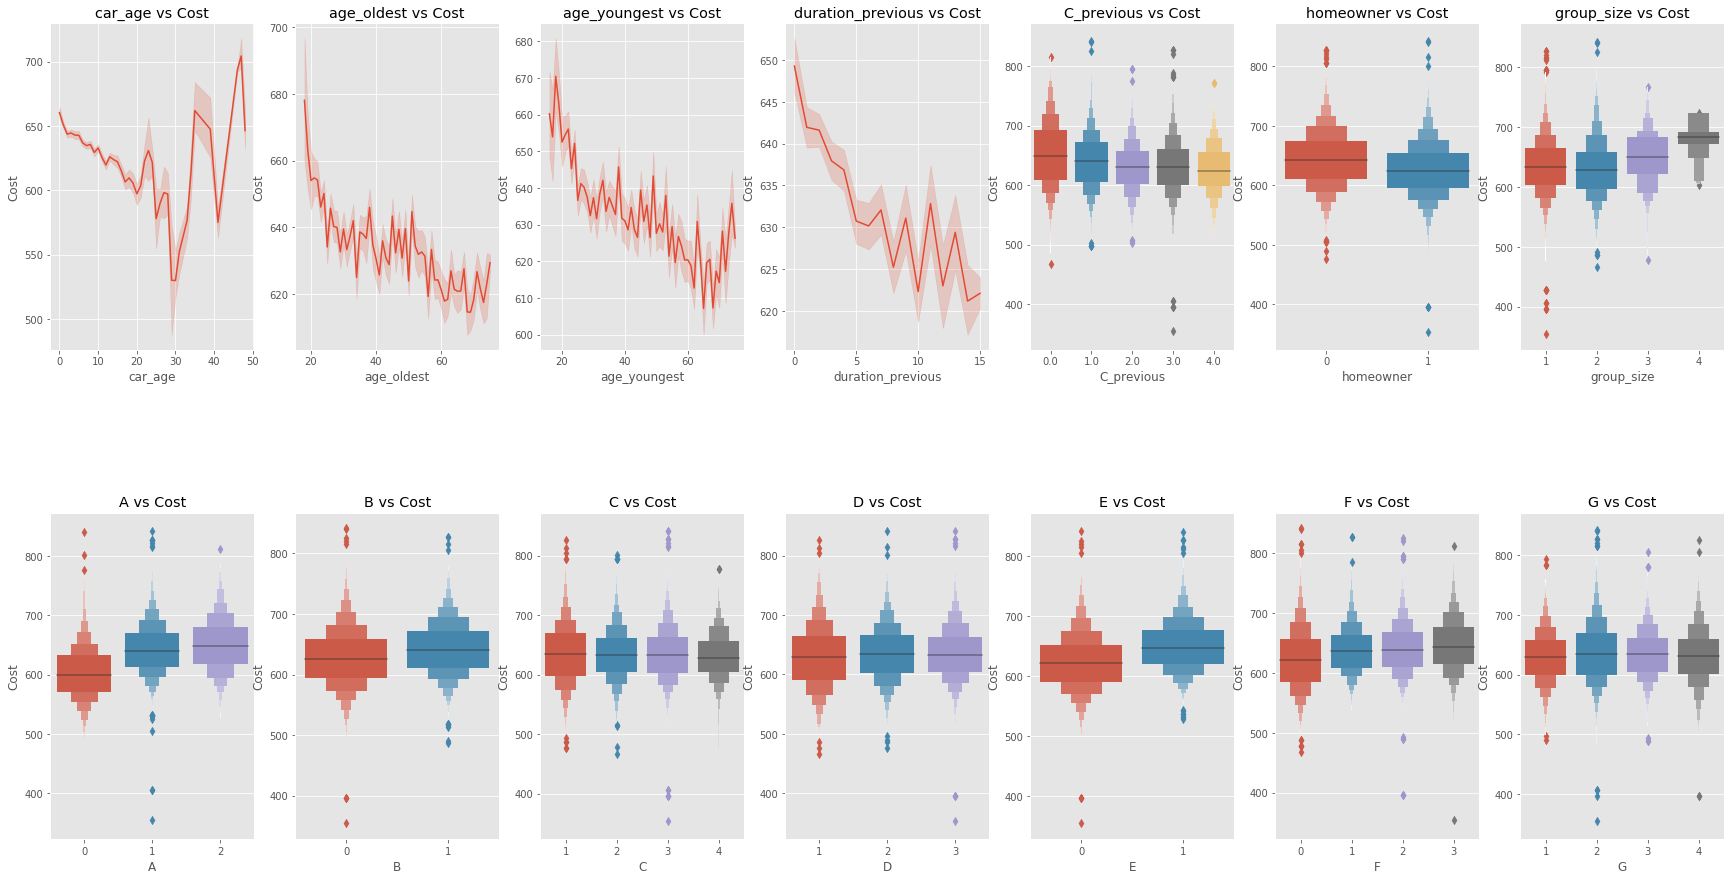

In [4]:
# Write code here
list_of_vars = ['car_age','age_oldest','age_youngest','duration_previous','C_previous','homeowner','group_size','A','B','C','D','E','F','G']
plt.figure(figsize=(30,15))
for i,var in enumerate(list_of_vars):
    plt.subplot(2,7,i+1)
    
    if len(set(DATA[var].dropna().values)) < 10:
        sns.boxenplot(x=var,y='cost',data=DATA)
           
    else:
        sns.lineplot(x=var,y='cost',data=DATA)
    plt.title(f"{var} vs Cost")
    plt.xlabel(var)
    plt.ylabel('Cost')
    plt.subplots_adjust(hspace=0.5)
   
  

### Exercise 2:

Convert all categorical data to be in the one-hot encoding format.

**Answer:**

In [5]:
"""# Write code here
columns = list(DATA.columns)
dataCat = DATA.copy()
for col in columns:
    if len(set(dataCat[col].dropna().values)) < 10:
        dataCat[col] = pd.Categorical(dataCat[col])
        dumTemp = pd.get_dummies(dataCat[col],prefix=col)
        dataCat = pd.merge(dataCat.drop(col,axis=1),dumTemp,left_index=True,right_index=True)

dumStates = pd.get_dummies(dataCat['state'],prefix='state_')
dataCat = pd.merge(dataCat.drop('state',axis=1),dumStates,left_index=True,right_index=True)

dataCat.columns = [each.replace(".0","") for each in dataCat.columns]"""

'# Write code here\ncolumns = list(DATA.columns)\ndataCat = DATA.copy()\nfor col in columns:\n    if len(set(dataCat[col].dropna().values)) < 10:\n        dataCat[col] = pd.Categorical(dataCat[col])\n        dumTemp = pd.get_dummies(dataCat[col],prefix=col)\n        dataCat = pd.merge(dataCat.drop(col,axis=1),dumTemp,left_index=True,right_index=True)\n\ndumStates = pd.get_dummies(dataCat[\'state\'],prefix=\'state_\')\ndataCat = pd.merge(dataCat.drop(\'state\',axis=1),dumStates,left_index=True,right_index=True)\n\ndataCat.columns = [each.replace(".0","") for each in dataCat.columns]'

In [6]:
dataCat = DATA.copy()
columns = ['state','car_value','A','B','C','D','E','F','G']

for col in columns:
    dataCat[col] = pd.Categorical(dataCat[col])
    dumTemp = pd.get_dummies(dataCat[col],prefix = col)
    dataCat = pd.merge(dataCat.drop(col,axis=1),dumTemp,left_index=True,right_index=True)


In [7]:
dataCat.head()

day  group_size  homeowner  car_age  risk_factor  age_oldest  age_youngest  \
0   1           1          0        9          0.0          24            24   
1   1           1          0        9          0.0          24            24   
2   4           1          1        7          0.0          74            74   
3   4           1          1        7          0.0          74            74   
4   3           1          0        4          4.0          26            26   

   married_couple  C_previous  duration_previous  ...  E_0  E_1  F_0  F_1  \
0               0         3.0                9.0  ...    1    0    1    0   
1               0         3.0                9.0  ...    0    1    0    0   
2               0         2.0               15.0  ...    0    1    0    0   
3               0         2.0               15.0  ...    0    1    0    0   
4               0         3.0                1.0  ...    1    0    0    0   

   F_2  F_3  G_1  G_2  G_3  G_4  
0    0    0    0    0    0    1  
1    0    1    0    1    0    0  
2    1    0    0    1    0    0  
3    1    0    0    1    0    0  
4    1    0    0    1    0    0  

[5 rows x 78 columns]

## Fitting a multiple linear regression

### Exercise 3:

Split your data into training and testing sets (an 80-20 split is a good starting point).

*Note: Keep random seed as 2019 in the code cell*

**Answer:**

In [8]:
np.random.seed(2019)
ndata = len(dataCat)
# Randomly choose 0.8n indices between 1 and n
idx_train = np.random.choice(range(ndata),int(0.8*ndata),replace=False)
# The test set is comprised from all the indices that were
# not selected in the training set:
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
train     = dataCat.iloc[idx_train] # the training data set
test      = dataCat.iloc[idx_test]  # the test data set

In [9]:
print(f'train shape:{train.shape}\ntest shape:{test.shape}')

train shape:(12386, 78)
test shape:(3097, 78)


### Exercise 4:

#### 4.1

Fit a multiple linear regression model to the training data regressing cost against all the other variables. Call this `model1`. What is the AIC value?

**Answer:**

In [10]:
text = " + ".join(each for each in sorted(set(dataCat.drop('cost',axis=1).columns)))
formula = "cost~"+text
model1 = smf.ols(formula,train).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     127.6
Date:                Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:14:13   Log-Likelihood:                -61802.
No. Observations:               12386   AIC:                         1.238e+05
Df Residuals:                   12311   BIC:                         1.243e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           207.2061      1.921    107.859      0.000     203.440     210.972
day[T.1]              1.8687      0.965      1.936      0.053      -0.024       3.761
day[T.2]             -1.6375      1.002     -1.634      0.102      -3.602       0.327
day[T.3]              0.3433      1.021      0.336      0.737      -1.658       2.345
day[T.4]             -2.1478      1.044     -2.057      0.040      -4.194      -0.101
day[T.5]              3.3399      2.739      1.219      0.223      -2.029       8.709
day[T.6]             -2.8931      8.713     -0.332      0.740     -19.971      14.185
A_0                  49.2281      1.266     38.887      0.000      46.747      51.709
A_1                  76.2780      0.931     81.963      0.000      74.454      78.102
A_2                  81.7000      1.103     74.039      0.000      79.537      83.863
B_0                 102.3652      1.033     99.080      0.000     100.340     104.390
B_1                 104.8409      1.044    100.380      0.000     102.794     106.888
C_1                  50.2338      0.933     53.858      0.000      48.406      52.062
C_2                  51.3956      0.868     59.217      0.000      49.694      53.097
C_3                  51.4375      0.774     66.484      0.000      49.921      52.954
C_4                  54.1392      1.228     44.087      0.000      51.732      56.546
C_previous           -6.0918      0.360    -16.926      0.000      -6.797      -5.386
D_1                  70.5817      1.001     70.505      0.000      68.619      72.544
D_2                  68.2174      0.867     78.648      0.000      66.517      69.918
D_3                  68.4070      0.882     77.538      0.000      66.678      70.136
E_0                  99.5982      1.050     94.878      0.000      97.541     101.656
E_1                 107.6079      1.060    101.562      0.000     105.531     109.685
F_0                  40.1009      1.291     31.067      0.000      37.571      42.631
F_1                  58.3169      0.972     60.014      0.000      56.412      60.222
F_2                  56.4994      0.893     63.285      0.000      54.749      58.249
F_3                  52.2889      1.539     33.979      0.000      49.273      55.305
G_1                  48.4149      0.872     55.498      0.000      46.705      50.125
G_2                  56.4570      0.700     80.684      0.000      55.085      57.829
G_3                  49.6279      0.853     58.161      0.000      47.955      51.300
G_4                  52.7063      0.910     57.932      0.000      50.923      54.490
age_oldest            0.5000      0.063      7.878      0.000       0.376       0.624
age_youngest         -0.9121      0.062    -14.695      0.000      -1.034      -0.790
car_age              -0.7299      0.068    -10.675      0.000      -0.864

#### 4.2 

According to `model1`, which states are most and least expensive?

**Answer:**

The most expensive state was DC with a coefficient of 47.8749 ,

and the least expensive was IA with a coefficient of -42.3168.

That means that if the car was bought in DC, it will cost 47.8749 more than if not, and if was bought in IA, it will cost 42.3168 less that if not.

#### 4.3

Interpret the coefficients of `group_size`, `homeowner`, `car_age`, `risk_factor`, `age_oldest`, `age_youngest`       `married_couple` , `duration_previous`. Do the signs and values of these coefficients make sense to you in the context of this business problem?

**Answer:**

In [11]:
list_vars = ['group_size',
             'homeowner',
             'car_age',
             'risk_factor',
             'age_oldest',
             'age_youngest',
             'married_couple',
             'duration_previous']
list_param = []
for var in list_vars:
    list_param.append(round(model1.params[var],3))
    
pd.DataFrame({'Features':list_vars,'Coef':list_param})


Features    Coef
0         group_size   3.604
1          homeowner -14.138
2            car_age  -0.730
3        risk_factor  -0.633
4         age_oldest   0.500
5       age_youngest  -0.912
6     married_couple -10.391
7  duration_previous  -1.447

How these are categorical features but not with a one-hot encoding, the coef with multiply each category of them and will take a value, so the coef is the basis parting from a main category, and the least of them will be increased or decreased by the coef

### Exercise 5:

Which variables from `model1` are statistically significant? (For categorical variables, consider them to be significant if at least one of their categories are statistically significant). Refit the model using only these variables; call this `model2`. How does this model compare to the previous model?

**Answer:**

In [12]:
SigVars = model1.pvalues[model1.pvalues<0.05].index.drop(['Intercept'])
display(set(dataCat.drop('cost',axis=1).columns) - set(SigVars))
display(SigVars)

        

{'car_value_a',
 'car_value_i',
 'day',
 'state_CO',
 'state_KS',
 'state_MS',
 'state_MT',
 'state_NE',
 'state_NM',
 'state_OR',
 'state_SD',
 'state_WY'}

Index(['day[T.4]', 'A_0', 'A_1', 'A_2', 'B_0', 'B_1', 'C_1', 'C_2', 'C_3',
       'C_4', 'C_previous', 'D_1', 'D_2', 'D_3', 'E_0', 'E_1', 'F_0', 'F_1',
       'F_2', 'F_3', 'G_1', 'G_2', 'G_3', 'G_4', 'age_oldest', 'age_youngest',
       'car_age', 'car_value_b', 'car_value_c', 'car_value_d', 'car_value_e',
       'car_value_f', 'car_value_g', 'car_value_h', 'duration_previous',
       'group_size', 'homeowner', 'married_couple', 'risk_factor', 'state_AL',
       'state_AR', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA',
       'state_IA', 'state_ID', 'state_IN', 'state_KY', 'state_MD', 'state_ME',
       'state_MO', 'state_ND', 'state_NH', 'state_NV', 'state_NY', 'state_OH',
       'state_OK', 'state_PA', 'state_RI', 'state_TN', 'state_UT', 'state_WA',
       'state_WI', 'state_WV'],
      dtype='object')

As we see, all the variables are statistically significant because, using the criteria called before, with some categories of a categorical feature as significant, all the feature is significant

In [13]:
# Write code here
text2 = " + ".join(each for each in sorted(dataCat.drop('cost',axis=1).columns))

formula2 = "cost~"+text2
model2 = smf.ols(formula2,train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     127.6
Date:                Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:14:14   Log-Likelihood:                -61802.
No. Observations:               12386   AIC:                         1.238e+05
Df Residuals:                   12311   BIC:                         1.243e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           207.2061      1.921    107.859      0.000     203.440     210.972
day[T.1]              1.8687      0.965      1.936      0.053      -0.024       3.761
day[T.2]             -1.6375      1.002     -1.634      0.102      -3.602       0.327
day[T.3]              0.3433      1.021      0.336      0.737      -1.658       2.345
day[T.4]             -2.1478      1.044     -2.057      0.040      -4.194      -0.101
day[T.5]              3.3399      2.739      1.219      0.223      -2.029       8.709
day[T.6]             -2.8931      8.713     -0.332      0.740     -19.971      14.185
A_0                  49.2281      1.266     38.887      0.000      46.747      51.709
A_1                  76.2780      0.931     81.963      0.000      74.454      78.102
A_2                  81.7000      1.103     74.039      0.000      79.537      83.863
B_0                 102.3652      1.033     99.080      0.000     100.340     104.390
B_1                 104.8409      1.044    100.380      0.000     102.794     106.888
C_1                  50.2338      0.933     53.858      0.000      48.406      52.062
C_2                  51.3956      0.868     59.217      0.000      49.694      53.097
C_3                  51.4375      0.774     66.484      0.000      49.921      52.954
C_4                  54.1392      1.228     44.087      0.000      51.732      56.546
C_previous           -6.0918      0.360    -16.926      0.000      -6.797      -5.386
D_1                  70.5817      1.001     70.505      0.000      68.619      72.544
D_2                  68.2174      0.867     78.648      0.000      66.517      69.918
D_3                  68.4070      0.882     77.538      0.000      66.678      70.136
E_0                  99.5982      1.050     94.878      0.000      97.541     101.656
E_1                 107.6079      1.060    101.562      0.000     105.531     109.685
F_0                  40.1009      1.291     31.067      0.000      37.571      42.631
F_1                  58.3169      0.972     60.014      0.000      56.412      60.222
F_2                  56.4994      0.893     63.285      0.000      54.749      58.249
F_3                  52.2889      1.539     33.979      0.000      49.273      55.305
G_1                  48.4149      0.872     55.498      0.000      46.705      50.125
G_2                  56.4570      0.700     80.684      0.000      55.085      57.829
G_3                  49.6279      0.853     58.161      0.000      47.955      51.300
G_4                  52.7063      0.910     57.932      0.000      50.923      54.490
age_oldest            0.5000      0.063      7.878      0.000       0.376       0.624
age_youngest         -0.9121      0.062    -14.695      0.000      -1.034      -0.790
car_age              -0.7299      0.068    -10.675      0.000      -0.864

With the same variables, model2 is equal to model1

### Exercise 6:

In addition to the variables in `model2`, add terms for:

1. square of `age_youngest`
2. square term for the age of the car
3. interaction term for `car_value` and `age_youngest`

**Answer:**

In [14]:
# Write code here
txtcv = ""
for n in ['a','b','c','d','e','f','g','h','i']:
    txtcv += f"+ car_value_{n}/age_youngest"
formula3 = formula2 + "+ I(age_youngest**2) + I(car_age**2)" +txtcv
model3 = smf.ols(formula3,train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     117.7
Date:                Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:14:14   Log-Likelihood:                -61641.
No. Observations:               12386   AIC:                         1.235e+05
Df Residuals:                   12300   BIC:                         1.241e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  225.6076      5.135     43.932      0.000     215.542     235.674
day[T.1]                     1.7486      0.956      1.830      0.067      -0.124       3.622
day[T.2]                    -1.4963      0.992     -1.509      0.131      -3.441       0.448
day[T.3]                     0.4462      1.009      0.442      0.658      -1.532       2.425
day[T.4]                    -2.1776      1.033     -2.108      0.035      -4.203      -0.152
day[T.5]                     2.6769      2.709      0.988      0.323      -2.634       7.988
day[T.6]                    -2.5260      8.610     -0.293      0.769     -19.404      14.352
A_0                         55.4937      2.026     27.396      0.000      51.523      59.464
A_1                         82.5334      1.837     44.935      0.000      78.933      86.134
A_2                         87.5805      1.927     45.450      0.000      83.803      91.358
B_0                        111.6655      2.596     43.010      0.000     106.576     116.755
B_1                        113.9421      2.598     43.853      0.000     108.849     119.035
C_1                         55.1605      1.507     36.605      0.000      52.207      58.114
C_2                         56.1636      1.471     38.183      0.000      53.280      59.047
C_3                         56.2487      1.420     39.617      0.000      53.466      59.032
C_4                         58.0348      1.700     34.131      0.000      54.702      61.368
C_previous                  -6.6392      0.357    -18.573      0.000      -7.340      -5.939
D_1                         77.0846      1.881     40.975      0.000      73.397      80.772
D_2                         74.3318      1.805     41.173      0.000      70.793      77.871
D_3                         74.1912      1.807     41.056      0.000      70.649      77.733
E_0                        108.4536      2.602     41.676      0.000     103.353     113.554
E_1                        117.1541      2.605     44.973      0.000     112.048     122.260
F_0                         44.3774      1.750     25.363      0.000      40.948      47.807
F_1                         62.4759      1.530     40.831      0.000      59.477      65.475
F_2                         61.1466      1.487     41.133      0.000      58.233      64.061
F_3                         57.6077      1.929     29.866      0.000      53.827      61.389
G_1                         52.9047      1.474     35.900      0.000      50.016      55.793
G_2                         60.7843      1.376     44.171      0.000      58.087      63.482
G_3                         54.3801      1.464     37.149      0.000      51.511      57.249
G_4                         57.5385      1.492     38.563      0.000      54.614      60.463
age_oldest    

## Feature selection

To reduce the number of features, it can often be helpful to aggregate the categories; for example, we can create a new variable by assigning each state to a larger region:

In [15]:
state_regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
# should download the above file
state_regions

State State Code     Region            Division
0                 Alaska         AK       West             Pacific
1                Alabama         AL      South  East South Central
2               Arkansas         AR      South  West South Central
3                Arizona         AZ       West            Mountain
4             California         CA       West             Pacific
5               Colorado         CO       West            Mountain
6            Connecticut         CT  Northeast         New England
7   District of Columbia         DC      South      South Atlantic
8               Delaware         DE      South      South Atlantic
9                Florida         FL      South      South Atlantic
10               Georgia         GA      South      South Atlantic
11                Hawaii         HI       West             Pacific
12                  Iowa         IA    Midwest  West North Central
13                 Idaho         ID       West            Mountain
14              Illinois         IL    Midwest  East North Central
15               Indiana         IN    Midwest  East North Central
16                Kansas         KS    Midwest  West North Central
17              Kentucky         KY      South  East South Central
18             Louisiana         LA      South  West South Central
19         Massachusetts         MA  Northeast         New England
20              Maryland         MD      South      South Atlantic
21                 Maine         ME  Northeast         New England
22              Michigan         MI    Midwest  East North Central
23             Minnesota         MN    Midwest  West North Central
24              Missouri         MO    Midwest  West North Central
25           Mississippi         MS      South  East South Central
26               Montana         MT       West            Mountain
27        North Carolina         NC      South      South Atlantic
28          North Dakota         ND    Midwest  West North Central
29              Nebraska         NE    Midwest  West North Central
30         New Hampshire         NH  Northeast         New England
31            New Jersey         NJ  Northeast     Middle Atlantic
32            New Mexico         NM       West            Mountain
33                Nevada         NV       West            Mountain
34              New York         NY  Northeast     Middle Atlantic
35                  Ohio         OH    Midwest  East North Central
36              Oklahoma         OK      South  West South Central
37                Oregon         OR       West             Pacific
38          Pennsylvania         PA  Northeast     Middle Atlantic
39          Rhode Island         RI  Northeast         New England
40        South Carolina         SC      South      South Atlantic
41          South Dakota         SD    Midwest  West North Central
42             Tennessee         TN      South  East South Central
43                 Texas         TX      South  West South Central
44                  Utah         UT       West            Mountain
45              Virginia         VA      South      South Atlantic
46               Vermont         VT  Northeast         New England
47            Washington         WA       West             Pacific
48             Wisconsin         WI    Midwest  East North Central
49         West Virginia         WV      South      South Atlantic
50               Wyoming         WY       West            Mountain

### Exercise 7:

#### 7.1

Create a new column where a state is replaced with the region it is in according to the above table.

**Answer:**

In [16]:
# Write code here
DATA2= DATA.copy()
mergdata = pd.merge(DATA2,state_regions[['State Code','Region']],how='inner',left_on='state',right_on='State Code')
mergdata.drop(['state','State Code'],axis=1,inplace=True)


In [17]:
# Write code here
dataCat2 = mergdata.copy()


#### 7.2

Fit the model as in `model13` but this time use `region` instead of `state`. Call this `model4`. Compare how this has affected the model.

**Answer:**

In [18]:
np.random.seed(2019)
ndata = len(dataCat2)
idx_train = np.random.choice(range(ndata),int(0.8*ndata),replace=False)
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
train2     = dataCat2.iloc[idx_train] 
test2      = dataCat2.iloc[idx_test]  

In [19]:
# Write code here

text = " + ".join(each for each in set(dataCat2.drop('cost',axis=1).columns))

formula = "cost~"+text
model4 = smf.ols(formula,train2).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     172.9
Date:                Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:14:16   Log-Likelihood:                -62267.
No. Observations:               12344   AIC:                         1.246e+05
Df Residuals:                   12302   BIC:                         1.249e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             676.9098      8.598     78.728      0.000     660.056     693.763
day[T.1]                1.3391      1.016      1.318      0.188      -0.653       3.331
day[T.2]               -1.6684      1.055     -1.581      0.114      -3.737       0.400
day[T.3]                1.2569      1.075      1.170      0.242      -0.850       3.363
day[T.4]               -1.3117      1.100     -1.192      0.233      -3.469       0.845
day[T.5]                5.5429      2.835      1.955      0.051      -0.015      11.100
day[T.6]                1.5297     10.103      0.151      0.880     -18.274      21.333
D[T.2]                  0.9802      1.251      0.784      0.433      -1.471       3.432
D[T.3]                  1.1272      1.283      0.879      0.380      -1.387       3.642
C[T.2]                 -0.9028      1.135     -0.796      0.426      -3.127       1.322
C[T.3]                  0.2022      1.188      0.170      0.865      -2.126       2.531
C[T.4]                  2.4628      1.783      1.382      0.167      -1.031       5.957
F[T.1]                 -3.1965      1.337     -2.391      0.017      -5.816      -0.577
F[T.2]                 -3.2949      1.299     -2.537      0.011      -5.841      -0.749
F[T.3]                 -7.5969      2.213     -3.433      0.001     -11.934      -3.260
car_value[T.b]        -78.7788     10.907     -7.222      0.000    -100.159     -57.399
car_value[T.c]        -58.7928      8.202     -7.168      0.000     -74.870     -42.715
car_value[T.d]        -54.8997      8.088     -6.788      0.000     -70.753     -39.046
car_value[T.e]        -54.6269      8.070     -6.769      0.000     -70.446     -38.808
car_value[T.f]        -54.4292      8.083     -6.733      0.000     -70.274     -38.584
car_value[T.g]        -50.5891      8.110     -6.238      0.000     -66.486     -34.692
car_value[T.h]        -44.1644      8.240     -5.360      0.000     -60.315     -28.013
car_value[T.i]        -23.1272      9.237     -2.504      0.012     -41.233      -5.021
A[T.1]                 39.1385      1.416     27.644      0.000      36.363      41.914
A[T.2]                 45.1207      1.745     25.856      0.000      41.700      48.541
B[T.1]                  2.0214      0.813      2.485      0.013       0.427       3.616
G[T.2]                 11.7567      0.937     12.548      0.000       9.920      13.593
G[T.3]                  7.7088      1.066      7.234      0.000       5.620       9.797
G[T.4]                  8.2936      1.275      6.507      0.000       5.795      10.792
Region[T.Northeast]    32.1792      1.236     26.026      0.000      29.756      34.603
Region[T.South]        24.2169      1.049     23.094      0.000      22.161      26.272
Region[T.West]         13.9579      1.209     11.546      0.000      11.588      16.328
E[T

### Exercise 8:

#### 8.1

What should we do next to minimize features?

**Answer:**

With the correlation heathmap we can see some very correlated variables:
 - married_couple with group_size
 - age_youngest with age_oldest
 
So the next step is remove 1 of these 2 variables

#### 8.2

Using a method of your choice, find the numerical feature(s) in `model4`, except for the three we added in Exercise 6, which exhibit multicollinearity. (Hint: consider looking at correlations.)

**Answer:**

In [20]:
num_feat = []

DATA3 = DATA.copy()
for var in DATA3.columns:
    if len(set(DATA3[var]))<10:
        DATA3[var] = DATA3[var].astype('category')
    try:
        if (DATA3[var].dtype == 'category'):
            print(f'{var} : {DATA3[var].dtype}')
    except:
        num_feat.append(var)
        print(f'{var} : {DATA3[var].dtype}')
        

day : category
state : category
group_size : category
homeowner : category
car_age : int64
car_value : category
risk_factor : category
age_oldest : int64
age_youngest : int64
married_couple : category
C_previous : category
duration_previous : float64
A : category
B : category
C : category
D : category
E : category
F : category
G : category
cost : int64


Text(0.5, 1, 'Correlation matrix')

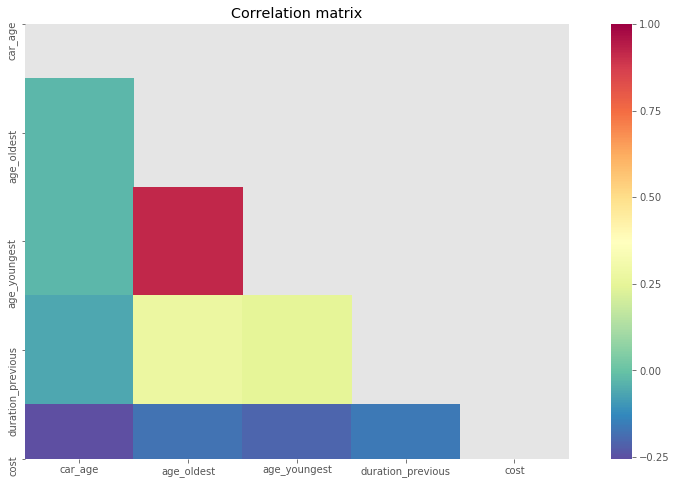

In [21]:

corrs = DATA3[num_feat].corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,8))
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True)
plt.title('Correlation matrix')

In [22]:
corrsunstack = corrs.abs().unstack().sort_values()
corsq = corrsunstack[(corrsunstack>0.6)&(corrsunstack!=1)]

checker=[]

filtered_index = []
varsf=[]
for i,j in zip(corsq.index.get_level_values(0),corsq.index.get_level_values(1)):
    if (i,j) not in checker:
        checker.append((j,i))
        filtered_index.append((i,j))
        
        
filtered_index

[('age_oldest', 'age_youngest')]

In [23]:
corsq[filtered_index]

age_oldest  age_youngest    0.917221
dtype: float64

#### 8.3:

Refit `model4` after dropping these redundant predictor(s); call this `model5`.

**Answer:**

In [24]:
# Write code here

text = " + ".join(each for each in set(dataCat2.drop(['cost','age_youngest'],axis=1).columns))
formula = "cost~"+text
model5 = smf.ols(formula,train2).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     167.5
Date:                Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:14:37   Log-Likelihood:                -62392.
No. Observations:               12344   AIC:                         1.249e+05
Df Residuals:                   12303   BIC:                         1.252e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             658.2970      8.604     76.509      0.000     641.432     675.163
G[T.2]                 12.0148      0.946     12.696      0.000      10.160      13.870
G[T.3]                  7.5295      1.076      6.996      0.000       5.420       9.639
G[T.4]                  8.0538      1.287      6.256      0.000       5.530      10.577
Region[T.Northeast]    32.2534      1.249     25.824      0.000      29.805      34.702
Region[T.South]        23.9728      1.059     22.634      0.000      21.897      26.049
Region[T.West]         14.0279      1.221     11.487      0.000      11.634      16.422
day[T.1]                1.5723      1.026      1.532      0.126      -0.439       3.584
day[T.2]               -1.7596      1.066     -1.651      0.099      -3.849       0.330
day[T.3]                1.3706      1.086      1.263      0.207      -0.757       3.498
day[T.4]               -1.5869      1.111     -1.428      0.153      -3.766       0.592
day[T.5]                6.2735      2.864      2.191      0.028       0.660      11.887
day[T.6]                0.6646     10.205      0.065      0.948     -19.340      20.669
C[T.2]                 -0.6783      1.146     -0.592      0.554      -2.925       1.568
C[T.3]                  0.0083      1.200      0.007      0.994      -2.344       2.360
C[T.4]                  1.8385      1.800      1.021      0.307      -1.690       5.367
F[T.1]                 -3.7255      1.350     -2.760      0.006      -6.371      -1.080
F[T.2]                 -3.5346      1.312     -2.694      0.007      -6.106      -0.963
F[T.3]                 -8.3109      2.235     -3.719      0.000     -12.691      -3.931
A[T.1]                 39.1704      1.430     27.389      0.000      36.367      41.974
A[T.2]                 45.7552      1.762     25.963      0.000      42.301      49.210
car_value[T.b]        -78.6549     11.018     -7.139      0.000    -100.252     -57.058
car_value[T.c]        -57.0254      8.285     -6.883      0.000     -73.264     -40.786
car_value[T.d]        -53.0277      8.169     -6.491      0.000     -69.040     -37.015
car_value[T.e]        -52.8658      8.151     -6.486      0.000     -68.843     -36.888
car_value[T.f]        -53.2021      8.165     -6.516      0.000     -69.207     -37.197
car_value[T.g]        -49.1705      8.192     -6.002      0.000     -65.228     -33.113
car_value[T.h]        -43.3197      8.323     -5.205      0.000     -59.634     -27.005
car_value[T.i]        -22.1413      9.331     -2.373      0.018     -40.431      -3.852
D[T.2]                  1.0937      1.263      0.866      0.387      -1.382       3.570
D[T.3]                  1.1706      1.296      0.903      0.366      -1.369       3.710
B[T.1]                  2.1293      0.822      2.592      0.010       0.519       3.740
E[T

#### 8.4

What would you do to diagnose the `model5` fit? What does this diagnosis suggest to you? (Hint: try plotting the residuals in various ways.)

**Answer:**

Text(0.5, 1.0, 'Model5 Residuals')

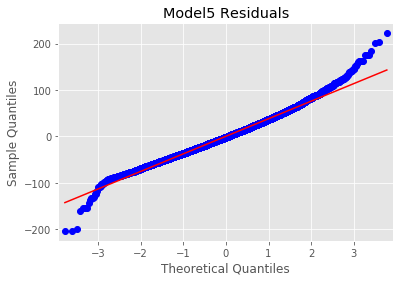

In [25]:
# Write code here
res = model5.resid
sm.qqplot(res, line="s");
plt.title('Model5 Residuals')

### Exercise 9:

#### 9.1

Find the best Box-Cox transformation of `cost` used to fit `model5`. What value do you get? (Hint: Visualizations will help also)

**Answer:**

In [27]:
from scipy import stats

In [28]:
# Write code here
price,fitted_lambda = stats.boxcox(dataCat2.cost)
round(fitted_lambda,2)

0.53

#### 9.2

Refit `model5`, but now with the transformation as suggested by the Box-Cox. Call it `model6`.

**Answer:**

In [29]:
# Write code here
if 'age_youngest' in num_feat:
    num_feat.remove('age_youngest')
text2 =  " + ".join(dataCat2.columns)

formula = "np.sqrt(cost)~"+text2
model6 = smf.ols(formula,train2).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.sqrt(cost)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.729e+05
Date:                Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:15:30   Log-Likelihood:                 27442.
No. Observations:               12344   AIC:                        -5.480e+04
Df Residuals:                   12301   BIC:                        -5.448e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.6093      0.007   1713.416      0.000      12.595      12.624
day[T.1]               -0.0008      0.001     -1.125      0.260      -0.002       0.001
day[T.2]               -0.0013      0.001     -1.770      0.077      -0.003       0.000
day[T.3]             4.356e-05      0.001      0.058      0.954      -0.001       0.002
day[T.4]               -0.0016      0.001     -2.107      0.035      -0.003      -0.000
day[T.5]            -2.312e-05      0.002     -0.012      0.991      -0.004       0.004
day[T.6]                0.0077      0.007      1.089      0.276      -0.006       0.022
car_value[T.b]         -0.0456      0.008     -5.981      0.000      -0.061      -0.031
car_value[T.c]         -0.0072      0.006     -1.259      0.208      -0.018       0.004
car_value[T.d]         -0.0054      0.006     -0.956      0.339      -0.016       0.006
car_value[T.e]         -0.0060      0.006     -1.063      0.288      -0.017       0.005
car_value[T.f]         -0.0064      0.006     -1.125      0.261      -0.017       0.005
car_value[T.g]         -0.0080      0.006     -1.415      0.157      -0.019       0.003
car_value[T.h]         -0.0070      0.006     -1.223      0.222      -0.018       0.004
car_value[T.i]         -0.0134      0.006     -2.080      0.038      -0.026      -0.001
A[T.1]                  0.0090      0.001      8.840      0.000       0.007       0.011
A[T.2]                  0.0050      0.001      3.968      0.000       0.003       0.007
B[T.1]                  0.0011      0.001      1.991      0.047    1.73e-05       0.002
C[T.2]                  0.0039      0.001      4.916      0.000       0.002       0.005
C[T.3]                  0.0023      0.001      2.774      0.006       0.001       0.004
C[T.4]                  0.0046      0.001      3.697      0.000       0.002       0.007
D[T.2]                  0.0025      0.001      2.916      0.004       0.001       0.004
D[T.3]                  0.0030      0.001      3.328      0.001       0.001       0.005
E[T.1]                 -0.0008      0.001     -1.310      0.190      -0.002       0.000
F[T.1]                  0.0045      0.001      4.802      0.000       0.003       0.006
F[T.2]                  0.0035      0.001      3.848      0.000       0.002       0.005
F[T.3]                  0.0047      0.002      3.053      0.002       0.002       0.008
G[T.2]                 -0.0027      0.001     -4.166      0.000      -0.004      -0.001
G[T.3]                  0.0007      0.001      0.919      0.358      -0.001       0.002
G[T.4]                 -0.0022      0.001     -2.453      0.014      -0.004      -0.000
Region[T.Northeast]     0.0069      0.001      7.815      0.000       0.005       0.009
Region[T.South]         0.0071      0.001      9.518      0.000       0.006       0.009
Reg

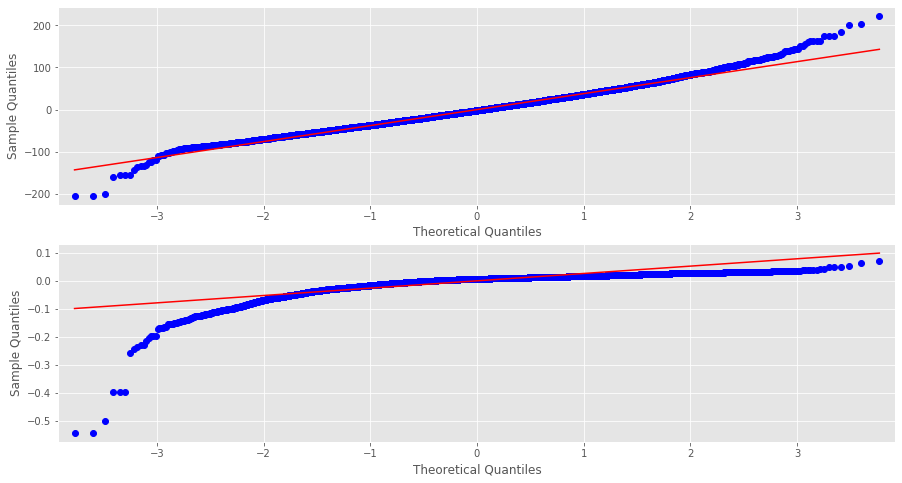

In [30]:
# Write code here
res2 = model6.resid

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
sm.qqplot(res, line="s",ax=ax1);

ax2 = fig.add_subplot(212)
sm.qqplot(res2, line="s",ax=ax2);




As we see, with the box-cox transformation, the model residuals trends to 0, so for the data, the model is well adapted.